# Lab3 : Convolutional Filters

---
###SVTH: Phạm Phúc Bình
###MSSV: 20110252
---
# 1. Change "**Picture1**" to your picture, and capture your results based on changing convolutional filters.
#2. Used new values in convolutional filter to capture features of your picture.



## 1.1. Chuẩn bị 
- Trong bài lab này, ảnh được sử dụng là ảnh của sinh viên với mục đích trích xuất các đặc trưng thông qua convolutional filters 
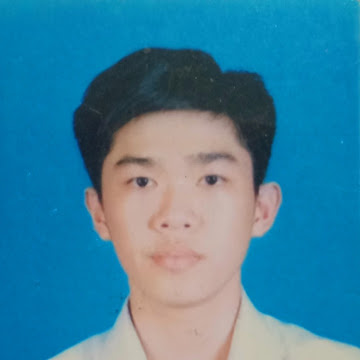

### 1.1.1. Load ảnh và xem thông số
Chúng ta sẽ sử dụng thư viện **urllib** để load ảnh từ url. Sau đó thực hiện các bước sau:
1. In ra kích thước ảnh
2. In ra ảnh dưới dạng ma trận
3. In ra pixel đầu tiên của ảnh (hàng 0 và cột 0)

In [149]:
# import cv2 module
import cv2
import urllib
import numpy as np

#Load image from url
url = "https://lh3.googleusercontent.com/a/AGNmyxby31cdytAQY35cxeYb_AZR1rNsSQqtNmu2hKtc=s360"
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# read the image
image = cv2.imdecode(arr, -1)

# shape prints the tuple (height,weight,channels)
# In ra một tuple thể hiện kích thước (theo pixels) và channels (các kênh màu) của bức ảnh
print(f"Shape of image: {image.shape}")

# img will be a numpy array of the above shape
#In ra bức ảnh dưới dạng ma trận
print(f"Image by matrix: {image}")


# read the image
# image = cv2.imread('/SamplePicture')
# this is pixel of 0th row and 0th column
print(f"The first pixel of the image: {image[0][0]}")


Shape of image: (360, 360, 3)
Image by matrix: [[[182 143  15]
  [182 143  15]
  [182 143  15]
  ...
  [183 164  89]
  [178 166 112]
  [164 160 119]]

 [[182 143  15]
  [182 143  15]
  [182 143  15]
  ...
  [177 158  61]
  [172 162  84]
  [167 165 101]]

 [[181 142  14]
  [181 142  14]
  [181 142  14]
  ...
  [184 160  40]
  [175 164  60]
  [173 172  82]]

 ...

 [[163 105   0]
  [163 105   0]
  [163 105   0]
  ...
  [171 187 180]
  [170 186 179]
  [170 186 179]]

 [[162 104   0]
  [163 105   0]
  [163 105   0]
  ...
  [169 186 182]
  [169 186 182]
  [168 186 179]]

 [[162 104   0]
  [163 105   0]
  [163 105   0]
  ...
  [170 187 183]
  [169 186 182]
  [169 187 180]]]
The first pixel of the image: [182 143  15]


Sau khi chạy cell trên, chúng ta đã có các thông số của ảnh như sau:
- Kích thước ảnh là 360x360 với 3 kênh màu RGB cho mỗi điểm ảnh (có giá trị từ 0 tới 255)
- Ma trận các điểm ảnh được thể hiện
- Pixel hàng 0 cột 0 có giá trị : [182 143  15]

## 1.2. Xem ảnh màu
Tiến hành xem ảnh bằng hàm cv2_imshow của thư viện google.colab.patches

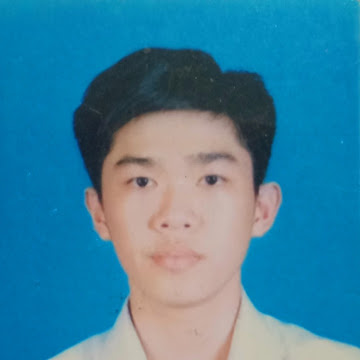

In [150]:
# Chúng ta sử dụng hàm cv2_imshow thay cho cv2.imshow để chạy trên colab
from google.colab.patches import cv2_imshow
# show image đã load được ở trên
cv2_imshow(image)
# wait and quit
cv2.waitKey(0)
cv2.destroyAllWindows()

## 1.3. Xem ảnh trắng đen
Tiếp theo chúng ta sẽ tiến hành chuyển ảnh trên sang ảnh trắng đen để dễ xử lý ảnh và trich xuất các đặc trưng

Anh goc


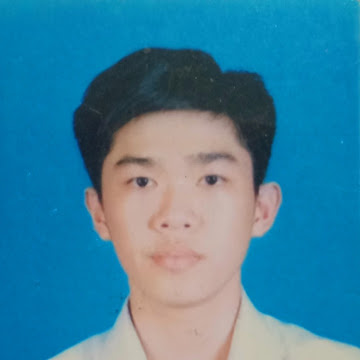

Anh trang den


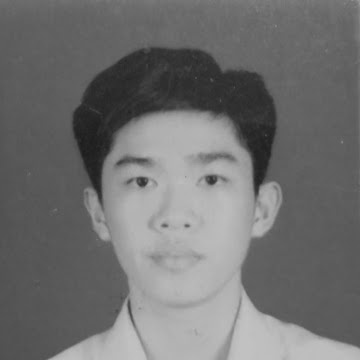

In [151]:
import cv2
import numpy as np

print("Anh goc")
cv2_imshow(image)
print("Anh trang den")
# load the image and scale to 0..1
image = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE).astype(float)

# load + show the original
cv2_imshow(image)
# wait and quit
cv2.waitKey(0)
cv2.destroyAllWindows()

## 1.4. Áp dụng bộ lọc
Sau khi có được ảnh với bộ lọc GrayScale, chúng ta tiến hành thử một số bộ lọc 

### 1.4.1. Bộ lọc tìm kiếm cạnh ngang (horizontal edge detecting filter)
Dưới đây là một số bộ lọc phổ biến để tìm kiếm cạnh ngang:


#### Prewitt filter: 

Anh goc


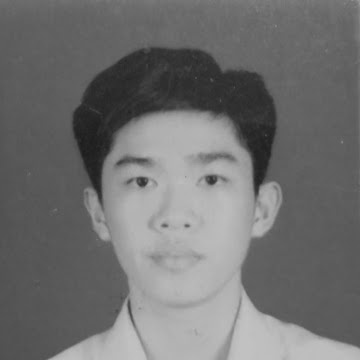

Anh duoc lam ro canh ngang


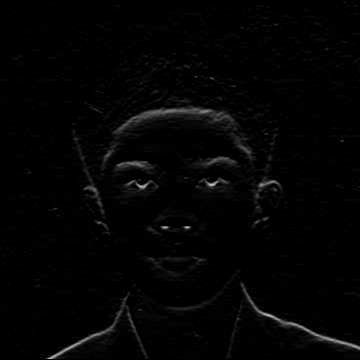

In [152]:
# horizontal edge detector Prewitt
# ma trận này là bộ lọc Prewitt để tìm kiếm cạnh ngang
kernel = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam ro canh ngang")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Sobel filter: 

Anh goc


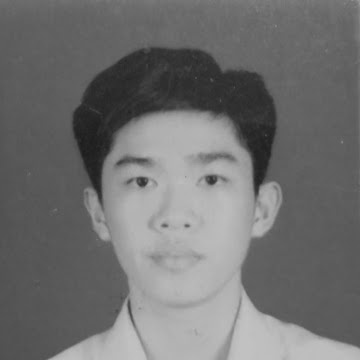

Anh duoc lam ro canh ngang


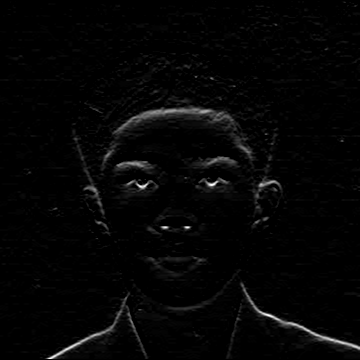

In [153]:
# horizontal edge detector Sobel
# ma trận này là bộ lọc Sobel để tìm kiếm cạnh ngang
kernel = np.array([[-1,  -2,  -1],
                   [0,  0,  0],
                   [1, 2, 1]])
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam ro canh ngang")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

=> Có thể thấy bộ lọc Sobel detect các cạnh ngang rõ ràng hơn bộ lọc Prewitt

### 1.4.2. Bộ lọc tìm kiếm cạnh dọc (vertical edge detecting filter)
Tương tự như tìm kiếm cạnh ngang, chúng ta cũng có 2 bộ lọc Sobel và Prewitt để tìm kiếm cạnh dọc



#### Prewitt filter: 

Anh goc


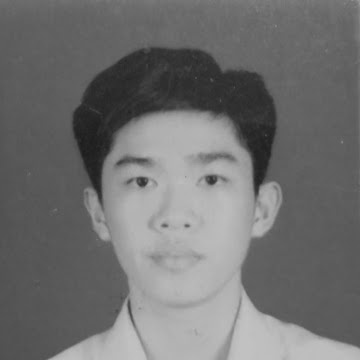

Anh duoc lam ro canh doc


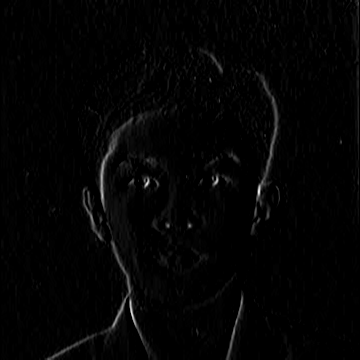

In [154]:
# vertical edge detector Prewitt
# ma trận này là bộ lọc Prewitt để tìm kiếm cạnh dọc
kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam ro canh doc")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Sobel filter: 

Anh goc


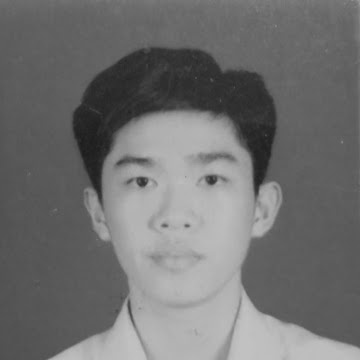

Anh duoc lam ro canh doc


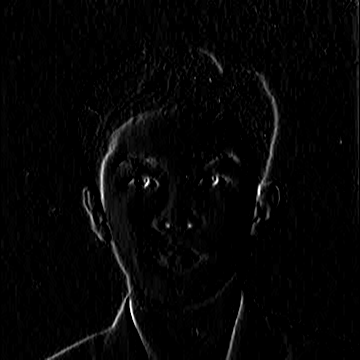

In [155]:
# vertical edge detector Sobel
# ma trận này là bộ lọc Sobel để tìm kiếm cạnh dọc
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam ro canh doc")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

=> Bộc lọc Sobel phát hiện cạnh rõ ràng hơn Prewitt do có trọng số lớn hơn

### 1.4.3 Bộ lọc làm mờ (blurring)
Dưới đây là một số bộ lọc phổ biến để làm mờ ảnh


#### a. Box filter: 

Anh goc


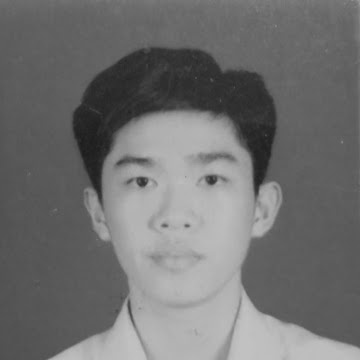

Anh duoc lam mo


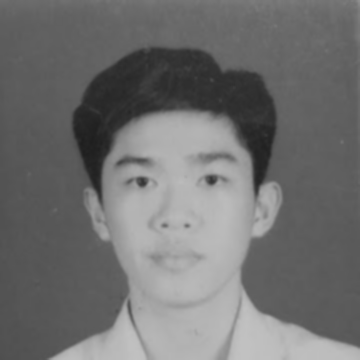

In [156]:
# blurring ("box blur", because it's a box of ones) then divide by 9 to decrease the brightness
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])/9
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam mo")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### b. Gaussian filter:

Anh goc


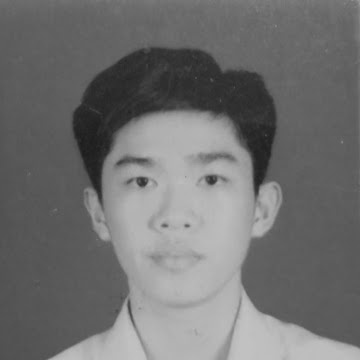

Anh duoc lam mo


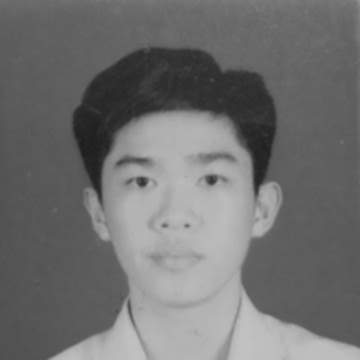

In [157]:
# Gaussian filter to blur the image
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])/16
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam mo")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### c. Gaussian Blur: filter:

Anh goc


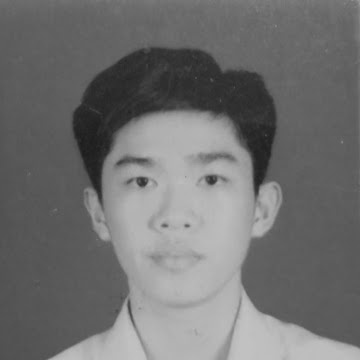

Anh duoc lam mo


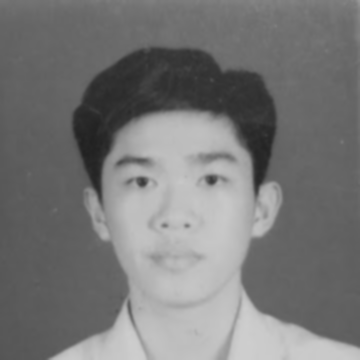

In [158]:
#Gaussian Blur:
kernel = np.array([[1, 4, 7, 4, 1],
                  [4, 16, 26, 16, 4],
                  [7, 26, 41, 26, 7],
                  [4, 16, 26, 16, 4],
                  [1, 4, 7, 4, 1]])/256
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam mo")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### d. Mean filter với độ lớn kernel lớn hơn:

Anh goc


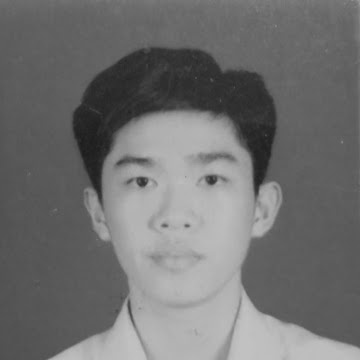

Anh duoc lam mo


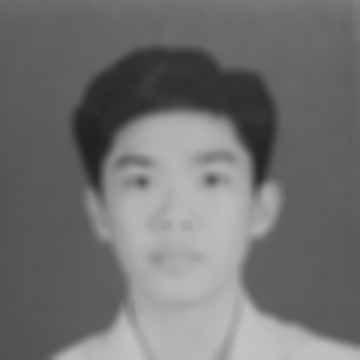

In [159]:
kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])/120
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam mo")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

=> Có thể thấy khi mở rộng kernel, khả năng làm mờ tốt hơn hẳn.

### 1.4.4. Bộ lọc làm nét (sharpening) và tăng cường (enhanced)

#### a. Unsharp mask filter:
Filter này làm rõ các chi tiết của ảnh

Anh goc


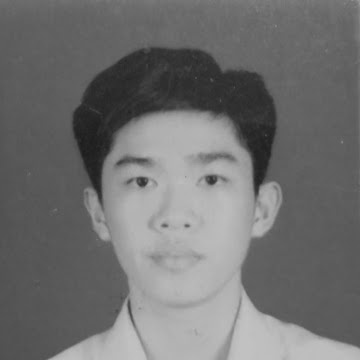

Anh duoc lam net


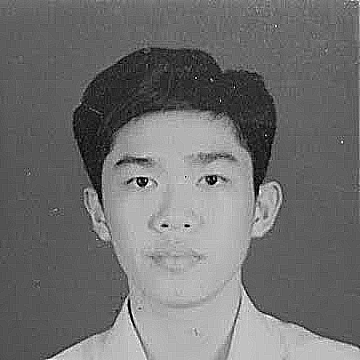

In [160]:
# sharpening using Unsharp mask filter
kernel = (np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]]))
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam net")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### b. Laplacian filter:


> ⛔ Filter này làm rõ các cạnh của vật thể, tuy nhiên độ nhiễu lớn và làm bức ảnh không mịn màng



Anh goc


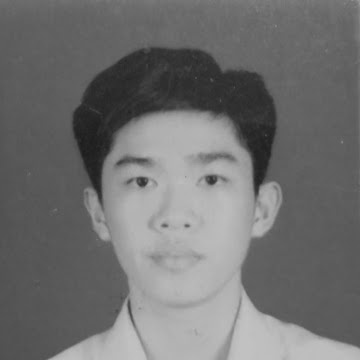

Anh duoc lam net


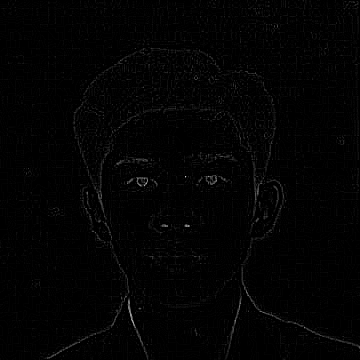

In [161]:
kernel = (np.array([ [1, 1, 1], [1, -8, 1], [1, 1, 1] ]))
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc lam net")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### c. Sharpening - Enhanced filter:




Anh goc


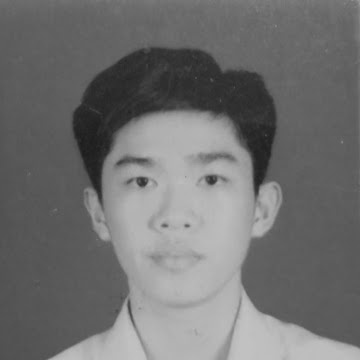

Anh duoc tang cuong


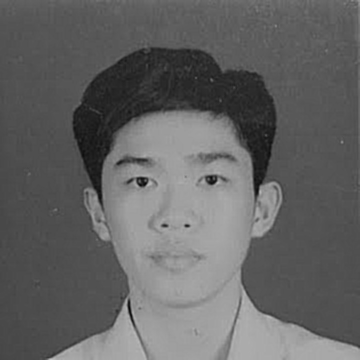

In [162]:
# sharpening using Sharpening - Enhanced filter
kernel = (np.array([ [-1, -1, -1, -1, -1], [-1, 2, 2, 2, -1], [-1, 2, 8, 2, -1], [-1, 2, 2, 2, -1], [-1, -1, -1, -1, -1] ]))/9
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc tang cuong")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### d. High-Boost Filter

Anh goc


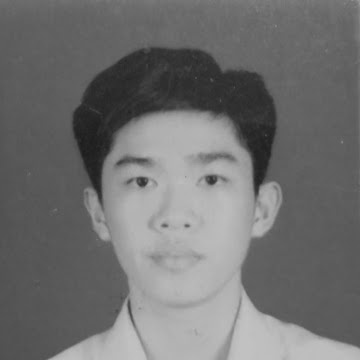

Anh duoc tang cuong


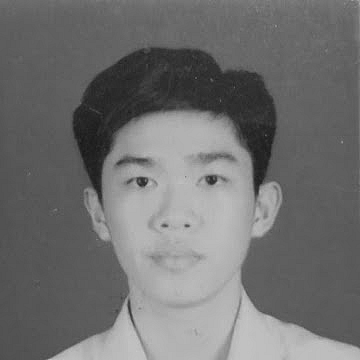

In [163]:
# sharpening using High-Boost Filter
kernel = (np.array([ [-1, -1, -1], [-1, 16, -1], [-1, -1, -1] ]))/8
filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)
print("Anh goc")
cv2_imshow(image)
print("Anh duoc tang cuong")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 1.4.5. Một số bộ lọc khác



#### a. Histogram equalization filter : Tăng độ tương phản và cải thiện chất lượng ảnh bằng cách phân bổ lại độ sáng của các pixel trong ảnh.
> - Bộ lọc này có sẵn trong openCV: cv2.equalizeHist

Anh goc


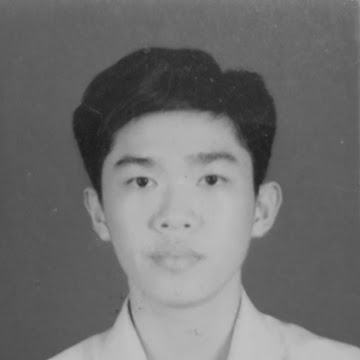

Anh duoc dieu chinh


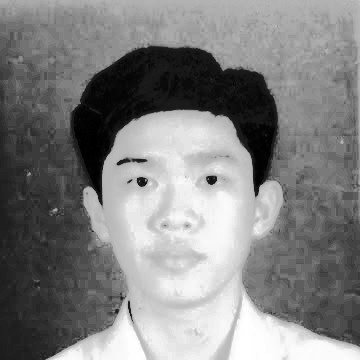

In [164]:
# sharpening using Histogram equalization filter
url = "https://lh3.googleusercontent.com/a/AGNmyxby31cdytAQY35cxeYb_AZR1rNsSQqtNmu2hKtc=s360"
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# read the image
color_image = cv2.imdecode(arr, -1)
gray = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
filtered = cv2.equalizeHist(gray)
print("Anh goc")
cv2_imshow(gray)
print("Anh duoc dieu chinh")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### b. Bộ lọc Median: Bộ lọc này được dùng để làm mờ ảnh màu
> - Bộ lọc Median có sẵn trong OpenCV: cv2.medianBlur(image, do_mo)





Anh goc


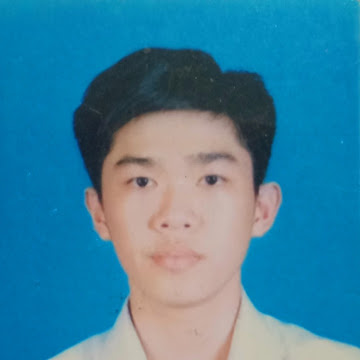

Anh duoc dieu chinh


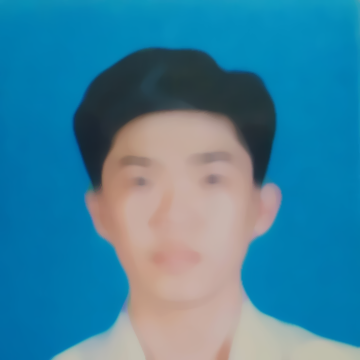

In [165]:
# sharpening using Histogram equalization filter
url = "https://lh3.googleusercontent.com/a/AGNmyxby31cdytAQY35cxeYb_AZR1rNsSQqtNmu2hKtc=s360"
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# read the image
color_image = cv2.imdecode(arr, -1)
filtered = cv2.medianBlur(color_image, 15)
print("Anh goc")
cv2_imshow(color_image)
print("Anh duoc dieu chinh")
cv2_imshow(filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()